In [15]:
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np

In [16]:
class Plant:
    def __init__(self, name, cost, revenue):
        self.name = name
        self.cost = cost
        self.revenue = revenue

    def __str__(self):
        return f"{self.name} - {self.cost} - {self.revenue}"

In [17]:
class Space:
    def __init__(self, name, demand, delivered=0):
        self.name = name
        self.demand = demand
        self.delivered = delivered

    def __str__(self):
        return f"{self.name} - {self.demand}"

In [18]:
class Agent:
    def __init__(self, max_capacity, location):
        self.max_capacity = max_capacity
        self.current_capacity = max_capacity
        self.location = location
        self.routes = []
        self.current_route = []
        self.HQ = location
    
    def move(self, new_location):

        current_edge = [self.location.name, new_location.name]
        self.location = new_location
        
        if new_location == self.HQ:
            self.current_capacity = self.max_capacity
            self.current_route.append(current_edge)
            self.routes.append(self.current_route)
            self.current_route = []
        else:
            if self.current_capacity >= new_location.demand - new_location.delivered:
                # Se puede entregar toda la demanda
                self.current_capacity -= new_location.demand - new_location.delivered
                new_location.delivered = new_location.demand
            else:
                # No se puede entregar toda la demanda
                new_location.delivered += self.current_capacity
                self.current_capacity = 0
            
            self.current_route.append(current_edge)
    
    def next(self, environment):
        # Hay lugares por visitar
        # Espacios de busqueda
        search_space = [space for space in environment if ((space.name != self.location) and (space.demand != space.delivered) and (space.name != 'HQ'))]
        
        if self.current_capacity == 0:
            # Regreso a HQ
            self.move(environment[0])
        else:
            if search_space:
                next_space = min(search_space, key=lambda space: space.demand - space.delivered)
                self.move(next_space)
            # Actualizacion de estado
            else:
                print("Todos los nodos han sido visitados.")
                return

    def view_state(self):
        space = self.location
        print(f"Location: {space.name}")
        print(f"Delivered: {space.delivered}/{space.demand}")
        print(f"Current Capacity: {self.current_capacity}")
        print("-------------------------")

    def view_graph(self):
        dim = int(np.ceil(np.sqrt(len(self.routes))))
        
        # fig = plt.figure(figsize=(10,10))
        fig = plt.figure(figsize=(15,15))

        fig.suptitle("Routes", fontsize=16)  # Title for the entire figure

        for i, route in enumerate(self.routes):
            print(i,route)
            ax = fig.add_subplot(dim, dim, i+1)
            ax.set_title(f"Route {i+1}")  # Title for each subplot
            # ax.text(0.5, -0.1, route, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

            G = nx.DiGraph() 
            G.add_edges_from(route)
            nx.draw_networkx(G, ax=ax)

        plt.tight_layout()
        plt.show()
        

    def search(self, environment):
        # Goal state: All spaces have demand = delivered
        while any([space.demand != space.delivered for space in environment]):
            self.next(environment)

        if self.location.name != 'HQ':
            self.move(environment[0])
        # Goal state reached
        print("All spaces have been visited.")
        self.view_graph()

All spaces have been visited.
0 [['Bodega', 'C1'], ['C1', 'C6'], ['C6', 'C2'], ['C2', 'Bodega']]
1 [['Bodega', 'C2'], ['C2', 'C7'], ['C7', 'C3'], ['C3', 'Bodega']]
2 [['Bodega', 'C3'], ['C3', 'C8'], ['C8', 'Bodega']]
3 [['Bodega', 'C5'], ['C5', 'C10'], ['C10', 'Bodega']]
4 [['Bodega', 'C10'], ['C10', 'C4'], ['C4', 'Bodega']]
5 [['Bodega', 'C4'], ['C4', 'C9'], ['C9', 'Bodega']]
6 [['Bodega', 'C9'], ['C9', 'Bodega']]


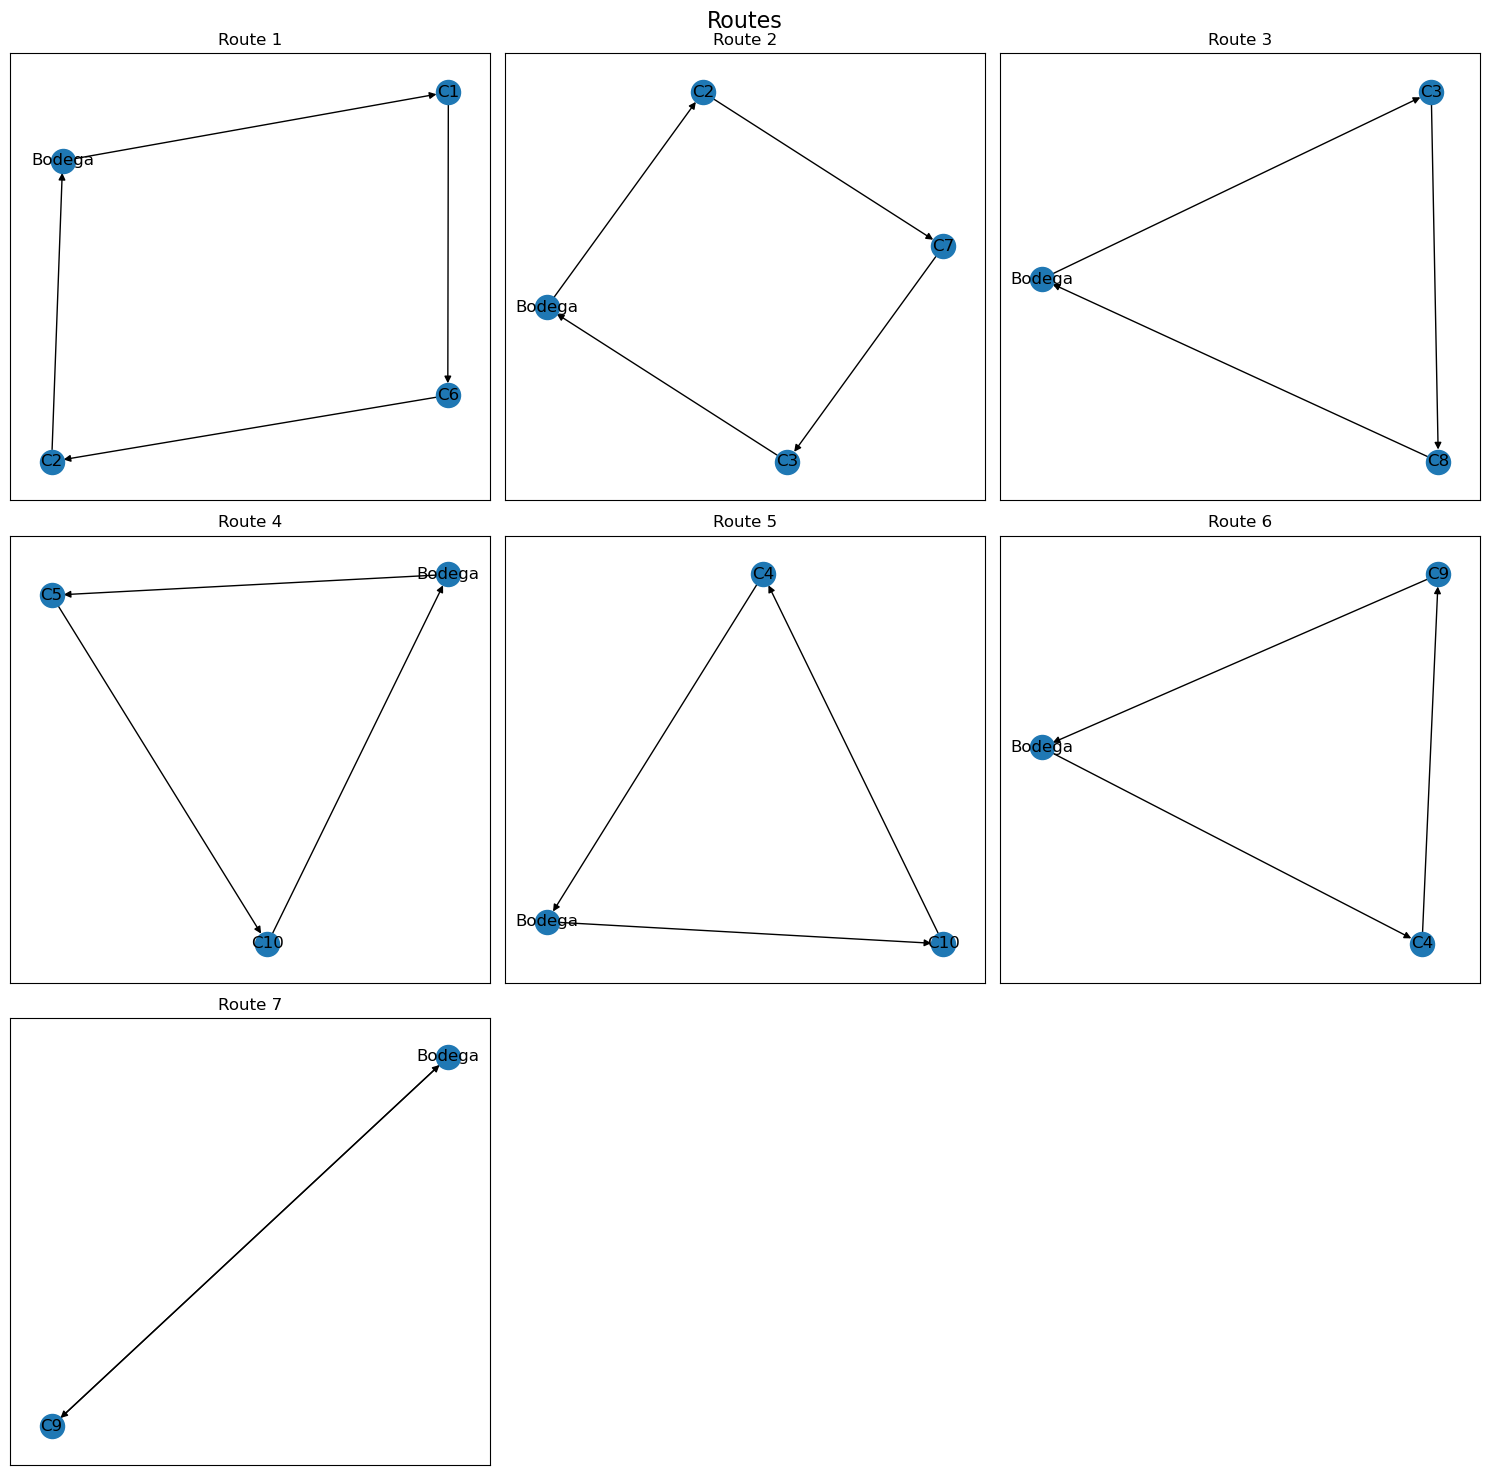

In [19]:
# Environment
# El primero es la HQ
spaces = [
    Space('Bodega', demand=0), # HQ
    Space('C1', demand=2), 
    Space('C2', demand=3), 
    Space('C3', demand=4), 
    Space('C4', demand=7), 
    Space('C5', demand=5),
    Space('C6', demand=2), 
    Space('C7', demand=3), 
    Space('C8', demand=4), 
    Space('C9', demand=7), 
    Space('C10', demand=5)]

# Agent
raul = Agent(6, spaces[0])

raul.search(spaces)